In [ ]:
from google.colab import files
uploaded = files.upload()

# After uploading the dataset, proceed with importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, GRU, SpatialDropout1D, Input, BatchNormalization
# Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras.preprocessing.sequence
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# After uploading the dataset, proceed with importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, GRU, SpatialDropout1D, Input, BatchNormalization
# Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras.preprocessing.sequence
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Saving archive (3).zip to archive (3).zip


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import zipfile
import os

# Upload the zip file
from google.colab import files
uploaded = files.upload()

# Extract the ZIP file
zip_file_name = next(iter(uploaded))  # Get the name of the uploaded file
extracted_folder = '/content/extracted_files/'

# Create the folder to store extracted files
os.makedirs(extracted_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List the extracted files to see what's inside
extracted_files = os.listdir(extracted_folder)
print("Extracted files:", extracted_files)

# Load the CSV file from the extracted folder (replace 'yourfile.csv' with actual filename)
csv_file_path = os.path.join(extracted_folder, extracted_files[0])  # assuming the CSV is the first file
df = pd.read_csv(csv_file_path)

# Print the actual column names in your DataFrame
print(df.columns)

# Data Preprocessing
# Update to the actual column names from your dataset
df = df[['category', 'rating']]  # Adjust column names according to the dataset's format
df = df.dropna()  # Remove any rows with missing values
# Assuming 'rating' column contains labels: 0 or 1
df['label'] = df['rating'].map({1.0: 0, 2.0: 0, 3.0: 0, 4.0: 1, 5.0: 1})
df = shuffle(df).reset_index(drop=True)
df = df[['text_', 'label']] # Select only the desired columns

# Rename the 'category' column to 'text'
df = df.rename(columns={'text_': 'text'})

# Display first few rows to understand the structure
print("\nDataset Shape:", df.shape)
print("\nLabel Distribution:\n", df['label'].value_counts())
print("\nSample Data:")
print(df.head())

Saving archive (3).zip to archive (3) (1).zip
Extracted files: ['fake reviews dataset.csv']
Index(['category', 'rating', 'label', 'text_'], dtype='object')

Dataset Shape: (40432, 2)

Label Distribution:
 label
1    24559
0    15873
Name: count, dtype: int64

Sample Data:
                           text  label
0  Clothing_Shoes_and_Jewelry_5      0
1               Movies_and_TV_5      1
2            Home_and_Kitchen_5      1
3                       Books_5      0
4                 Electronics_5      1


In [ ]:
#Preprocessing text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['cleaned_review'] = df['text'].apply(preprocess_text)

# Display some cleaned reviews
print(df['cleaned_review'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0    clothing shoe jewelry
1                    movie
2             home kitchen
3                     book
4              electronics
Name: cleaned_review, dtype: object


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])
padded = pad_sequences(sequences, maxlen=250)  # Maximum length of sequences

# Prepare data for training
X = padded
y = df['label'].values

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# BiLSTM Model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=250))
bilstm_model.add(SpatialDropout1D(0.3))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(64)))
bilstm_model.add(Dense(128, activation='relu'))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(1, activation='sigmoid'))
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

# GRU Model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=10000, output_dim=128, input_length=250))
gru_model.add(SpatialDropout1D(0.3))
gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model.add(Bidirectional(GRU(64)))
gru_model.add(Dense(128, activation='relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train BiLSTM Model
from keras.callbacks import EarlyStopping  # Import EarlyStopping

bilstm_callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_valid, y_valid), callbacks=bilstm_callbacks)




Epoch 1/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.6107 - loss: 0.6676 - val_accuracy: 0.6138 - val_loss: 0.6661
Epoch 2/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 607s 1s/step - accuracy: 0.6056 - loss: 0.6703 - val_accuracy: 0.6138 - val_loss: 0.6658
Epoch 3/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 614s 1s/step - accuracy: 0.6053 - loss: 0.6703 - val_accuracy: 0.6138 - val_loss: 0.6658
Epoch 4/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 622s 1s/step - accuracy: 0.6064 - loss: 0.6694 - val_accuracy: 0.6138 - val_loss: 0.6662
Epoch 5/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 606s 1s/step - accuracy: 0.6041 - loss: 0.6700 - val_accuracy: 0.6138 - val_loss: 0.6661
Epoch 6/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.6074 - loss: 0.6688 - val_accuracy: 0.6138 - val_loss: 0.6661


In [ ]:
# Train GRU Model
gru_callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
gru_history = gru_model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_valid, y_valid), callbacks=gru_callbacks)

Epoch 1/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 659s 1s/step - accuracy: 0.6032 - loss: 0.6736 - val_accuracy: 0.6138 - val_loss: 0.6679
Epoch 2/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 687s 1s/step - accuracy: 0.6077 - loss: 0.6696 - val_accuracy: 0.6138 - val_loss: 0.6666
Epoch 3/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 673s 1s/step - accuracy: 0.6020 - loss: 0.6712 - val_accuracy: 0.6138 - val_loss: 0.6656
Epoch 4/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 685s 1s/step - accuracy: 0.6069 - loss: 0.6700 - val_accuracy: 0.6138 - val_loss: 0.6681
Epoch 5/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 679s 1s/step - accuracy: 0.6088 - loss: 0.6693 - val_accuracy: 0.6138 - val_loss: 0.6664
Epoch 6/6
506/506 ━━━━━━━━━━━━━━━━━━━━ 686s 1s/step - accuracy: 0.6015 - loss: 0.6712 - val_accuracy: 0.6138 - val_loss: 0.6657



--- BiLSTM ---
253/253 ━━━━━━━━━━━━━━━━━━━━ 37s 143ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3123
           1       0.61      1.00      0.76      4964

    accuracy                           0.61      8087
   macro avg       0.31      0.50      0.38      8087
weighted avg       0.38      0.61      0.47      8087

Confusion Matrix:
 [[   0 3123]
 [   0 4964]]
Accuracy: 0.6138246568566835
ROC-AUC: 0.5314273979827348

--- GRU ---
253/253 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3123
           1       0.61      1.00      0.76      4964

    accuracy                           0.61      8087
   macro avg       0.31      0.50      0.38      8087
weighted avg       0.38      0.61      0.47      8087

Confusion Matrix:
 [[   0 3123]
 [   0 4964]]
Accuracy: 0.6138246568566835
ROC-AUC: 0.5318113987795057


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


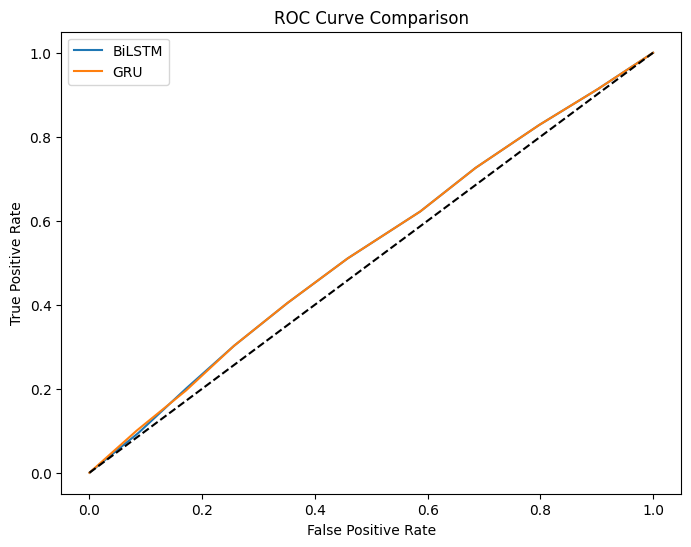

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n--- {model_name} ---")
    pred_probs = model.predict(X_test)
    pred_labels = (pred_probs > 0.5).astype(int)
    print(classification_report(y_test, pred_labels))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))
    print("Accuracy:", accuracy_score(y_test, pred_labels))
    print("ROC-AUC:", roc_auc_score(y_test, pred_probs))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, pred_probs)
    plt.plot(fpr, tpr, label=model_name)

# Evaluate models
plt.figure(figsize=(8, 6))
evaluate_model(bilstm_model, X_valid, y_valid, "BiLSTM")
evaluate_model(gru_model, X_valid, y_valid, "GRU")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


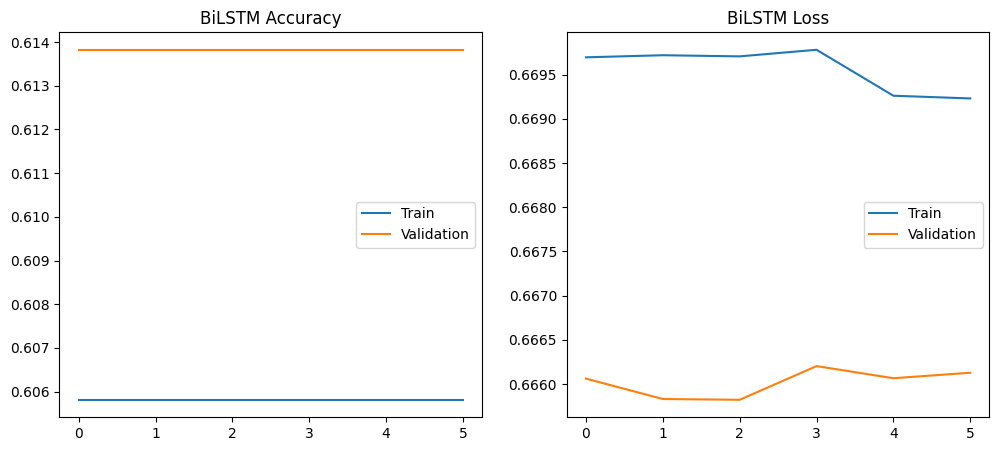

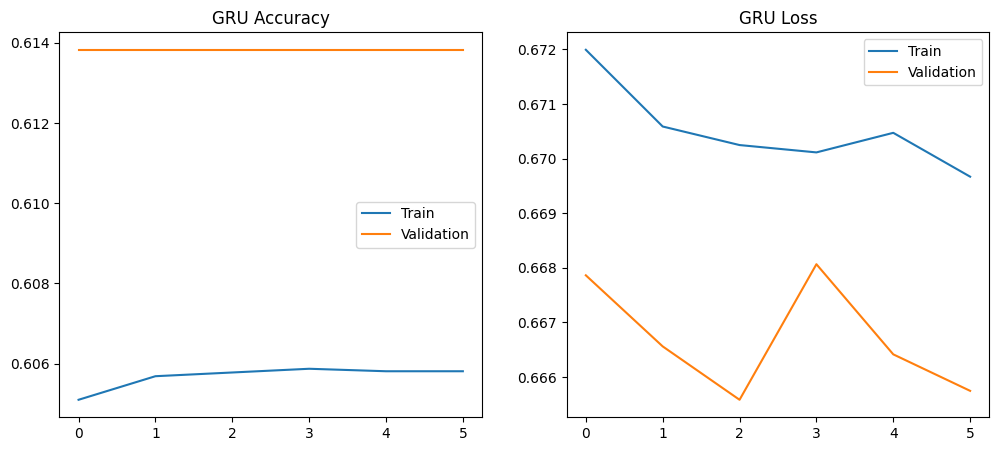

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()

# Plot training history for both models
plot_history(bilstm_history, "BiLSTM")
plot_history(gru_history, "GRU")


In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
def evaluate_model_graphically(model, X_test, y_test, name="Model"):
    y_probs = model.predict(X_test)
    y_pred = (y_probs > 0.5).astype(int)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    return fpr, tpr, auc


In [ ]:
from sklearn.linear_model import LogisticRegression

# Use TF-IDF for ML model input
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_review']).toarray()
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_ml, y_train_ml)
y_probs_log = log_model.predict_proba(X_test_ml)[:, 1]
y_pred_log = (y_probs_log > 0.5).astype(int)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3123
           1       0.61      1.00      0.76      4964

    accuracy                           0.61      8087
   macro avg       0.31      0.50      0.38      8087
weighted avg       0.38      0.61      0.47      8087



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


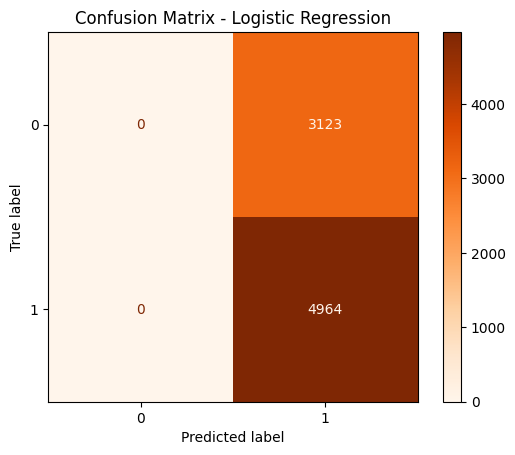

In [ ]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_ml, y_pred_log))

cm = confusion_matrix(y_test_ml, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr_log, tpr_log, _ = roc_curve(y_test_ml, y_probs_log)


253/253 ━━━━━━━━━━━━━━━━━━━━ 35s 137ms/step


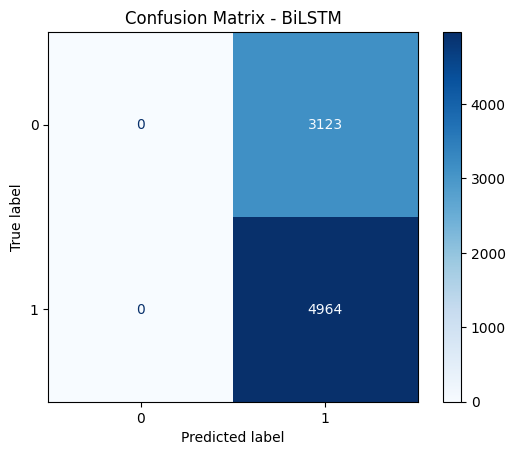

In [ ]:
# Predicted Probabilities & Labels for BiLSTM
y_probs_bilstm = bilstm_model.predict(X_valid)
y_pred_bilstm = (y_probs_bilstm > 0.5).astype(int)

# Import necessary modules if not already imported
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the plot_confusion_matrix function
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot
plot_confusion_matrix(y_valid, y_pred_bilstm, "BiLSTM")

253/253 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step


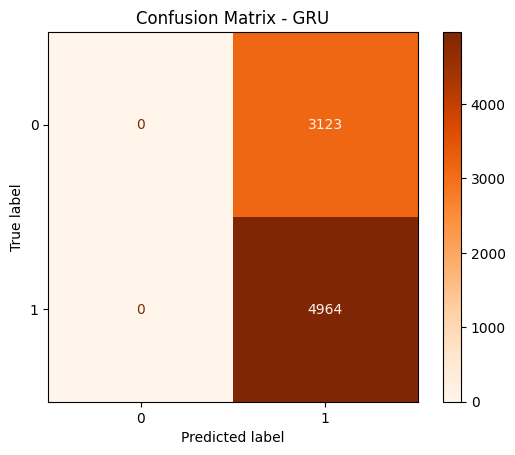

In [ ]:
# Predict and binarize
y_pred_gru = (gru_model.predict(X_valid) > 0.5).astype(int)

# Create and plot confusion matrix
cm_gru = confusion_matrix(y_valid, y_pred_gru)
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru)
disp_gru.plot(cmap='Oranges')
plt.title("Confusion Matrix - GRU")
plt.show()


In [ ]:
gru_accuracy = gru_model.evaluate(X_valid, y_valid)[1]

253/253 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.6017 - loss: 0.6710


In [ ]:
bilstm_accuracy = bilstm_model.evaluate(X_valid, y_valid)[1]

253/253 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.6017 - loss: 0.6701


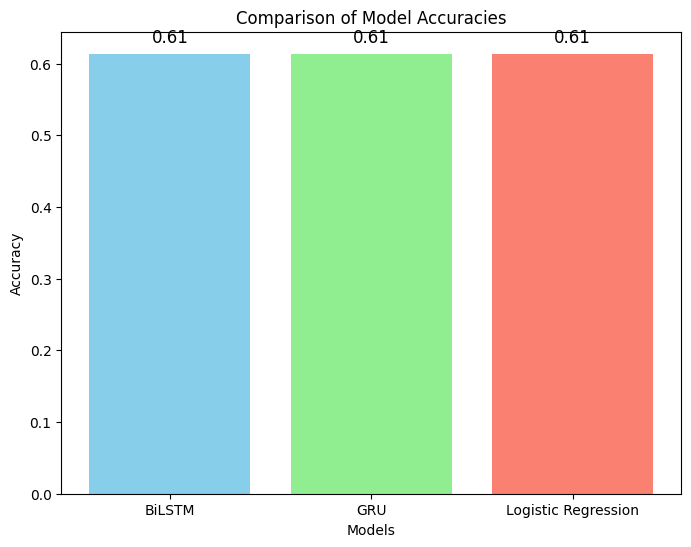

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy for Logistic Regression (assuming you have y_test_ml and y_pred_log from previous cells)
from sklearn.metrics import accuracy_score  # Import accuracy_score if not already imported
lr_accuracy = accuracy_score(y_test_ml, y_pred_log)

# Now use the calculated accuracies
accuracies = [bilstm_accuracy, gru_accuracy, lr_accuracy]
model_names = ['BiLSTM', 'GRU', 'Logistic Regression']

# Bar plot for model comparison
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
ax.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')

# Show accuracy values on top of the bars
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

In [ ]:
# ... (previous code) ...

# Example for BiLSTM and GRU (after prediction)
# Assuming X_valid and y_valid are your test data for the deep learning models
bilstm_predictions = bilstm_model.predict(X_valid)  # Get continuous predictions
gru_predictions = gru_model.predict(X_valid)        # Get continuous predictions

# Convert continuous predictions to binary using a threshold (0.5 in this case)
bilstm_predictions_binary = (bilstm_predictions > 0.5).astype(int)
gru_predictions_binary = (gru_predictions > 0.5).astype(int)

# Calculate metrics for BiLSTM and GRU
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

bilstm_precision = precision_score(y_valid, bilstm_predictions_binary)  # Use binary predictions
gru_precision = precision_score(y_valid, gru_predictions_binary)      # Use binary predictions

# Repeat for recall, F1-score, etc., using y_valid and the respective binary predictions
bilstm_recall = recall_score(y_valid, bilstm_predictions_binary)
bilstm_f1 = f1_score(y_valid, bilstm_predictions_binary)
bilstm_roc_auc = roc_auc_score(y_valid, bilstm_predictions)  # ROC-AUC can use continuous predictions

gru_recall = recall_score(y_valid, gru_predictions_binary)
gru_f1 = f1_score(y_valid, gru_predictions_binary)
gru_roc_auc = roc_auc_score(y_valid, gru_predictions)        # ROC-AUC can use continuous predictions


# Calculate metrics for Logistic Regression (assuming y_test_ml and y_pred_log from a previous cell)
# Make sure y_probs_log is available from the Logistic Regression cell
lr_precision = precision_score(y_test_ml, y_pred_log)
lr_recall = recall_score(y_test_ml, y_pred_log)
lr_f1 = f1_score(y_test_ml, y_pred_log)
lr_roc_auc = roc_auc_score(y_test_ml, y_probs_log)  # Assuming y_probs_log is available

# Print the results for comparison
print("Logistic Regression - Precision: ", lr_precision, "Recall: ", lr_recall, "F1: ", lr_f1, "ROC-AUC: ", lr_roc_auc)
print("BiLSTM - Precision: ", bilstm_precision, "Recall: ", bilstm_recall, "F1: ", bilstm_f1, "ROC-AUC: ", bilstm_roc_auc)
print("GRU - Precision: ", gru_precision, "Recall: ", gru_recall, "F1: ", gru_f1, "ROC-AUC: ", gru_roc_auc)

# ... (rest of the code) ...

253/253 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step
Logistic Regression - Precision:  0.6138246568566835 Recall:  1.0 F1:  0.7607079917247721 ROC-AUC:  0.5310800362675303
BiLSTM - Precision:  0.6138246568566835 Recall:  1.0 F1:  0.7607079917247721 ROC-AUC:  0.5314273979827348
GRU - Precision:  0.6138246568566835 Recall:  1.0 F1:  0.7607079917247721 ROC-AUC:  0.5318113987795057


In [ ]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
# For GRU
gru_cm = confusion_matrix(y_test, gru_predictions)
# For BiLSTM
bilstm_cm = confusion_matrix(y_test, bilstm_predictions)

# Bar plot for each model's confusion matrix
models = ['Logistic Regression', 'GRU', 'BiLSTM']
correct_preds = [lr_cm[0,0] + lr_cm[1,1], gru_cm[0,0] + gru_cm[1,1], bilstm_cm[0,0] + bilstm_cm[1,1]]
incorrect_preds = [lr_cm[0,1] + lr_cm[1,0], gru_cm[0,1] + gru_cm[1,0], bilstm_cm[0,1] + bilstm_cm[1,0]]

# Bar plot for comparison
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

# Create bars for correct and incorrect predictions
plt.bar(index, correct_preds, bar_width, color='green', label='Correct')
plt.bar(index + bar_width, incorrect_preds, bar_width, color='red', label='Incorrect')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'y_test' is not defined

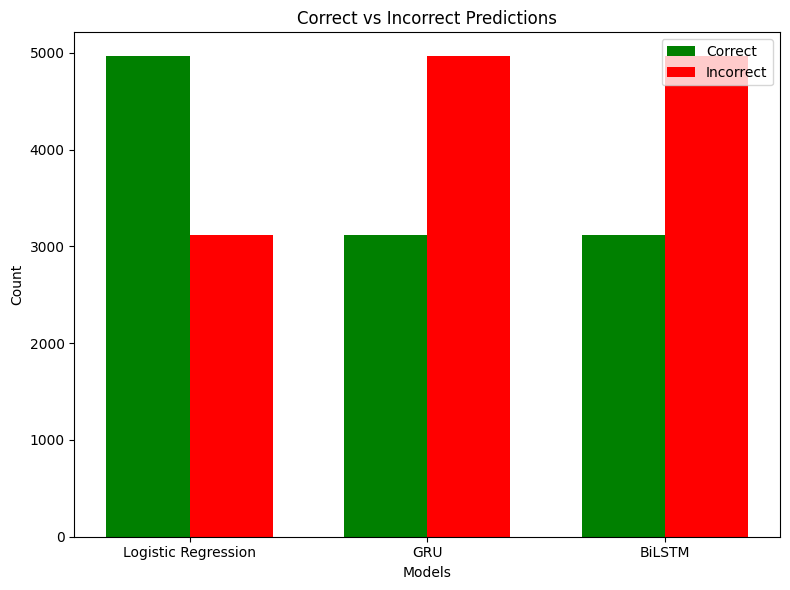

In [ ]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression
lr_cm = confusion_matrix(y_test_ml, y_pred_log)  # Use y_test_ml and y_pred_log for Logistic Regression
# For GRU
gru_cm = confusion_matrix(y_valid, gru_predictions.astype(int)) # Use y_valid and gru_predictions for GRU, convert predictions to int
# For BiLSTM
bilstm_cm = confusion_matrix(y_valid, bilstm_predictions.astype(int)) # Use y_valid and bilstm_predictions for BiLSTM, convert predictions to int


# Bar plot for each model's confusion matrix
models = ['Logistic Regression', 'GRU', 'BiLSTM']
correct_preds = [lr_cm[0,0] + lr_cm[1,1], gru_cm[0,0] + gru_cm[1,1], bilstm_cm[0,0] + bilstm_cm[1,1]]
incorrect_preds = [lr_cm[0,1] + lr_cm[1,0], gru_cm[0,1] + gru_cm[1,0], bilstm_cm[0,1] + bilstm_cm[1,0]]

# Bar plot for comparison
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

# Create bars for correct and incorrect predictions
plt.bar(index, correct_preds, bar_width, color='green', label='Correct')
plt.bar(index + bar_width, incorrect_preds, bar_width, color='red', label='Incorrect')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Sample product reviews (e-commerce data)
sample_reviews = [
    "This phone is amazing, great features, and the camera quality is fantastic!",
    "I didn't like the product, it stopped working after a week of use.",
    "The shoes are comfortable, but they look a bit cheap in person.",
    "Great value for money, very satisfied with my purchase.",
    "Terrible customer service, will not buy from this seller again."
]


In [ ]:
# Instead of:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# Use:
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras.preprocessing.sequence
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing for BiLSTM and GRU (tokenization and padding)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sample_reviews)
sample_reviews_seq = tokenizer.texts_to_sequences(sample_reviews)
sample_reviews_padded = pad_sequences(sample_reviews_seq, padding='post', maxlen=100)

# Preprocessing for Logistic Regression (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
sample_reviews_tfidf = tfidf_vectorizer.fit_transform(sample_reviews)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras.preprocessing.sequence
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing for BiLSTM and GRU (tokenization and padding)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sample_reviews)
sample_reviews_seq = tokenizer.texts_to_sequences(sample_reviews)
sample_reviews_padded = pad_sequences(sample_reviews_seq, padding='post', maxlen=100)

# Preprocessing for Logistic Regression (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
sample_reviews_tfidf = tfidf_vectorizer.fit_transform(sample_reviews)

In [ ]:
!pip install requests beautifulsoup4 lxml
import requests
from bs4 import BeautifulSoup

def get_amazon_reviews(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    html = requests.get(url, headers=headers).text
    soup = BeautifulSoup(html, "lxml")
    reviews = soup.find_all("span", {"data-hook": "review-body"})
    return [rev.text.strip() for rev in reviews[:5]]

def predict_reviews(reviews, dl_model, clean_text, tokenizer, max_len=100): # Added dl_model, clean_text, tokenizer, and max_len
    cleaned = [clean_text(r) for r in reviews]
    seq = tokenizer.texts_to_sequences(cleaned)
    pad = pad_sequences(seq, maxlen=max_len)
    preds = (dl_model.predict(pad) > 0.5).astype(int)
    for i, r in enumerate(reviews):
        print(f"\nReview: {r}\nPrediction: {'REAL' if preds[i]==1 else 'FAKE'}")

sample_url = "https://www.amazon.com/product-reviews/B07FZ8S74R"
reviews = get_amazon_reviews(sample_url)

# Assuming you have defined dl_model, clean_text, tokenizer somewhere in your notebook
# For example:
# dl_model = bilstm_model  # or gru_model
# def clean_text(text): # Assuming clean_text is defined in previous cells
#    # Preprocessing logic
#    return processed_text

# You need to define clean_text function based on your preprocessing logic

# Call predict_reviews with necessary arguments
#predict_reviews(reviews, dl_model, clean_text, tokenizer) # Call with your model and preprocessing function

In [ ]:
# Sample real-time reviews
reviews = [
    "I bought this phone and it broke within a month. I’m very disappointed.",
    "Excellent product! The screen is bright and clear, and the battery lasts all day.",
    "The item did not match the description. Very poor experience.",
    "Highly recommended. The build quality is great and the performance is smooth.",
]

# Function to preprocess input review like training data
def preprocess_review(review, tokenizer, maxlen):
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')
    return padded

print("\nReal-Time Review Predictions:\n")
for i, review in enumerate(reviews):
    # Logistic Regression prediction
    review_vec = vectorizer.transform([review])
    # Changed logistic_model to log_model (assuming it was a typo)
    lr_pred = log_model.predict(review_vec)[0]

    # BiLSTM prediction
    bilstm_input = preprocess_review(review, tokenizer, 250) # Adjusted maxlen to match BiLSTM input
    bilstm_prob = bilstm_model.predict(bilstm_input, verbose=0)[0][0]
    bilstm_pred = int(bilstm_prob > 0.5)

    # GRU prediction
    gru_prob = gru_model.predict(bilstm_input, verbose=0)[0][0]
    gru_pred = int(gru_prob > 0.5)

    print(f"Review {i+1}: {review}")
    print(f"Predicted by Logistic Regression: {'Real' if lr_pred == 1 else 'Fake'}")
    print(f"Predicted by BiLSTM: {'Real' if bilstm_pred == 1 else 'Fake'}")
    print(f"Predicted by GRU: {'Real' if gru_pred == 1 else 'Fake'}")
    print("-" * 100)


Real-Time Review Predictions:

Review 1: I bought this phone and it broke within a month. I’m very disappointed.
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Predicted by GRU: Real
----------------------------------------------------------------------------------------------------
Review 2: Excellent product! The screen is bright and clear, and the battery lasts all day.
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Predicted by GRU: Real
----------------------------------------------------------------------------------------------------
Review 3: The item did not match the description. Very poor experience.
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Predicted by GRU: Real
----------------------------------------------------------------------------------------------------
Review 4: Highly recommended. The build quality is great and the performance is smooth.
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Pr

In [ ]:
fake_reviews = [
    "Absolutely amazing product! Changed my life in every way! A must buy for everyone!!!",
    "Best phone ever!!! Works like a charm. I've bought 10 of them already!",
    "This vacuum cleaner cured my back pain and made me rich. 10/10 would buy again!",
    "The moment I opened the box, I cried tears of joy. Unbelievable quality and power!",
]



In [ ]:

# Function to preprocess input review like training data
def preprocess_review(review, tokenizer, maxlen):
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')
    return padded
maxlen =100
print("\nReal-Time Review Predictions:\n")
for i, review in enumerate(fake_reviews):
    # Logistic Regression prediction
    review_vec = vectorizer.transform([review])
    # Use log_model instead of logistic_model for prediction
    lr_pred = log_model.predict(review_vec)[0]

    # BiLSTM prediction
    bilstm_input = preprocess_review(review, tokenizer, maxlen)
    bilstm_prob = bilstm_model.predict(bilstm_input, verbose=0)[0][0]
    bilstm_pred = int(bilstm_prob > 0.5)

    # GRU prediction
    gru_prob = gru_model.predict(bilstm_input, verbose=0)[0][0]
    gru_pred = int(gru_prob > 0.5)

    print(f"Review {i+1}: {review}")
    print(f"Predicted by Logistic Regression: {'Real' if lr_pred == 1 else 'Fake'}")
    print(f"Predicted by BiLSTM: {'Real' if bilstm_pred == 1 else 'Fake'}")
    print(f"Predicted by GRU: {'Real' if gru_pred == 1 else 'Fake'}")
    print("-" * 100)


Real-Time Review Predictions:

Review 1: Absolutely amazing product! Changed my life in every way! A must buy for everyone!!!
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Predicted by GRU: Real
----------------------------------------------------------------------------------------------------
Review 2: Best phone ever!!! Works like a charm. I've bought 10 of them already!
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Predicted by GRU: Real
----------------------------------------------------------------------------------------------------
Review 3: This vacuum cleaner cured my back pain and made me rich. 10/10 would buy again!
Predicted by Logistic Regression: Real
Predicted by BiLSTM: Real
Predicted by GRU: Real
----------------------------------------------------------------------------------------------------
Review 4: The moment I opened the box, I cried tears of joy. Unbelievable quality and power!
Predicted by Logistic Regression: Real
Pre

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

# 1. Evaluate BiLSTM
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_padded, y_test, verbose=0)
y_pred_bilstm = (bilstm_model.predict(X_test_padded) > 0.5).astype("int32")

# 2. Evaluate GRU
gru_loss, gru_accuracy = gru_model.evaluate(X_test_padded, y_test, verbose=0)
y_pred_gru = (gru_model.predict(X_test_padded) > 0.5).astype("int32")

# 3. Confusion Matrix - BiLSTM
cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)
disp_bilstm = ConfusionMatrixDisplay(confusion_matrix=cm_bilstm)
disp_bilstm.plot(cmap='Blues')
plt.title("Confusion Matrix - BiLSTM")
plt.show()

# 4. Confusion Matrix - GRU
cm_gru = confusion_matrix(y_test, y_pred_gru)
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru)
disp_gru.plot(cmap='Greens')
plt.title("Confusion Matrix - GRU")
plt.show()

# 5. Bar Chart for Accuracy Comparison
models = ['BiLSTM', 'GRU']
accuracies = [bilstm_accuracy, gru_accuracy]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 0.01, f"{yval:.2f}")
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


NameError: name 'X_test_padded' is not defined